<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Looks-like-Topic-3-is-pro-voting-in-mail(washington-post),-while-Topic-2,4-are-critical-of-them(fox-news)" data-toc-modified-id="Looks-like-Topic-3-is-pro-voting-in-mail(washington-post),-while-Topic-2,4-are-critical-of-them(fox-news)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Looks like Topic 3 is pro voting in mail(washington post), while Topic 2,4 are critical of them(fox news)</a></span></li></ul></div>

In [359]:
from gensim.models.keyedvectors import KeyedVectors
import numpy as np
import re
from unidecode import unidecode

In [361]:
#wv_model= KeyedVectors.load_word2vec_format('/Users/tapas/Downloads/GoogleNews-vectors-negative300.bin',binary=True)

In [ ]:
print(dir(wv_model))

In [ ]:
def covert_to_string(filename):
    with open(filename,'r') as file:
        data = file.read().replace('\n','')
    return str(data)

In [ ]:
articles_path = '/Users/tapas/Documents/Repos/news_articles/*'

import glob
content_list = []
for file in glob.glob(articles_path):
    #print(covert_to_string(file))
    #print('*********************************************************************')
    content_list.append(covert_to_string(file))

In [ ]:
print(content_list[34])

In [ ]:
print(len(content_list))

In [ ]:
src = content_list[1]
target = content_list[2]
stopwords = ['www.foxnews.com','www.usatoday.com','www.washingtonpost.com']

In [ ]:
def vectorize(doc:str) -> np.ndarray:
    doc = unidecode(doc.lower())
    words = [w for w in re.split("[, \-.\"\+/':?\]\[)(]+",doc) if w not in stopwords]
    word_vecs = []
    for word in words:
        try:
            vec = wv_model[word]
            word_vecs.append(vec)
        except KeyError:
            print('could not find word ',word)
            pass
    vector = np.mean(word_vecs,axis=0)
    return vector

In [ ]:
src_vec = vectorize(src)
target_vec = vectorize(target)
target_vec2 = vectorize(content_list[34])

In [ ]:
src_vec.shape

In [ ]:
    def cosine_sim(vecA, vecB):
        """Find the cosine similarity distance between two vectors."""
        csim = np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))
        if np.isnan(np.sum(csim)):
            return 0
        return csim

In [ ]:
sim_score = cosine_sim(src_vec, target_vec)

In [ ]:
sim_score

In [ ]:
sim_score = cosine_sim(src_vec, target_vec2)

In [ ]:
sim_score

In [ ]:
import pandas as pd
df = pd.DataFrame(content_list,columns=["text"])

In [ ]:
print(df.head(1))

In [16]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('news_articles_2.sqlite')
df = pd.read_sql('select * from news_articles', conn)

In [17]:
len(df)

36

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /Users/tapas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tapas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
#stop_words = stopwords.words('english')
stop_words = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves',
              'he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their',
              'theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was',
              'were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and',
              'but','if','or','because','as','until','while','of','at','by','for','with','about','against','between',
              'into','through','during','before','after','above','below','to','from','up','down','in','out','on','off'
              ,'over','under','again','further','then','once','here','there','when','where','why','how','all','any',
              'both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than',
              'too','very','s','t','can','will','just','don','should','now']

In [22]:
import re
def remove_stop_words(content):
    return [word for word in content if word not in stop_words]

stemmer = PorterStemmer()

def stem_words(text):
    try:
        #text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1]
    except IndexError:
        pass
    return text

def clean_text(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    return text

def apply_all(text):
    return stem_words(remove_stop_words(nltk.word_tokenize(clean_text(text))))

In [23]:
df['tokenized_content'] = df.apply(lambda x : apply_all(x['content_full']),axis=1)

In [24]:
df['tokenized_content']

0     [voting, mail, new, millions, americans, summe...
1     [president, trump, determined, fight, efforts,...
2     [less, five, months, election, day, surprising...
3     [president, trump, persistent, attacks, mail, ...
4     [tonya, riley, first, secretary, homeland, sec...
5     [absentee, ballots, allow, voters, unable, go,...
6     [fox, news, contributors, richard, fowler, cha...
7     [trump, campaign, exploring, ways, get, back, ...
8     [fox, news, sunday, anchor, chris, wallace, jo...
9     [get, latest, news, coronavirus, delivered, da...
10    [judge, jeanine, pirro, discusses, push, vote,...
11    [speaker, pelosi, says, president, trump, beha...
12    [federal, judge, cleared, way, tuesday, texas,...
13    [last, week, president, trump, attacked, votin...
14    [irony, lurking, underneath, threats, presiden...
15    [federal, appeals, panel, thursday, rejected, ...
16    [fox, news, contributors, richard, fowler, cha...
17    [former, rep, darrell, issa, tells, fox, f

In [25]:
all_words = [word for string in list(df['tokenized_content']) for word in string]

In [26]:
from nltk import FreqDist
fdist = FreqDist(all_words)

In [27]:
len(fdist)

4336

In [28]:
df['source_id'].value_counts()

fox-news               19
the-washington-post    15
usa-today               2
Name: source_id, dtype: int64

In [29]:
k = 200
top_words = []
for key,value in fdist.most_common(k):
    top_words.append(key)

In [30]:
top_k_words = set(top_words)
top_k_words

{'absentee',
 'according',
 'allow',
 'allowing',
 'already',
 'also',
 'americans',
 'amid',
 'among',
 'announced',
 'app',
 'applications',
 'back',
 'ballot',
 'balloting',
 'ballots',
 'biery',
 'california',
 'campaign',
 'case',
 'cases',
 'cast',
 'claimed',
 'claiming',
 'claims',
 'colorado',
 'committee',
 'concerns',
 'coronavirus',
 'could',
 'county',
 'court',
 'cybersecurity',
 'data',
 'day',
 'decision',
 'democratic',
 'democrats',
 'doesn',
 'due',
 'efforts',
 'election',
 'elections',
 'even',
 'every',
 'evidence',
 'expand',
 'experts',
 'fact',
 'federal',
 'first',
 'five',
 'florida',
 'former',
 'fox',
 'fraud',
 'fraudulent',
 'funding',
 'general',
 'get',
 'go',
 'going',
 'gop',
 'gov',
 'governor',
 'great',
 'group',
 'groups',
 'health',
 'hold',
 'home',
 'house',
 'illegal',
 'including',
 'increase',
 'integrity',
 'judge',
 'know',
 'last',
 'latest',
 'law',
 'lawsuit',
 'lead',
 'legal',
 'less',
 'like',
 'likely',
 'long',
 'mail',
 'mailed',


In [31]:
def keep_top_k_words(text):
    return [word for word in text if word in top_k_words]

In [32]:
df['tokenized_content'] = df['tokenized_content'].apply(keep_top_k_words)

In [33]:
df['tokenized_content'].head(20)

0     [voting, mail, new, millions, americans, state...
1     [president, trump, efforts, voting, mail, nove...
2     [less, five, election, day, mail, balloting, p...
3     [president, trump, mail, voting, november, ele...
4     [first, secretary, security, president, trump,...
5     [absentee, ballots, allow, voters, go, electio...
6     [fox, news, president, trump, states, expand, ...
7     [trump, campaign, get, back, order, re, five, ...
8     [fox, news, president, trump, court, states, e...
9     [get, latest, news, coronavirus, sign, mail, v...
10    [judge, vote, mail, get, latest, news, coronav...
11    [pelosi, president, trump, many, like, get, la...
12    [federal, judge, way, tuesday, texas, voters, ...
13    [last, president, trump, voting, mail, federal...
14    [president, trump, states, trying, vote, mail,...
15    [federal, court, decision, allow, texas, voter...
16    [fox, news, get, latest, news, coronavirus, si...
17    [former, fox, california, gov, newsom, ord

In [34]:
mask = np.random.rand(len(df)) < 0.80
mask

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [35]:
mask
train_df = df[mask]
train_df.reset_index(drop=True,inplace=True)

test_df = df[~mask]
test_df.reset_index(drop=True,inplace=True)

In [2]:
len(test_df)

NameError: name 'test_df' is not defined

In [37]:
from gensim.models import LdaModel
from gensim import models, corpora, similarities

num_topics = 5
dictionary = corpora.Dictionary(df['tokenized_content'])
corpus = [dictionary.doc2bow(doc) for doc in df['tokenized_content']]

In [99]:
lda = LdaModel(corpus=corpus,num_topics=num_topics,id2word=dictionary,alpha=0.5e-2,eta=0.5e-2,minimum_probability=0.0,passes=10)

In [100]:
lda.show_topics(num_topics=5,num_words=20)

[(0,
  '0.032*"mail" + 0.029*"voting" + 0.028*"said" + 0.026*"state" + 0.019*"trump" + 0.016*"vote" + 0.015*"president" + 0.015*"election" + 0.015*"ballots" + 0.015*"voters" + 0.014*"fraud" + 0.014*"states" + 0.013*"coronavirus" + 0.012*"voter" + 0.012*"pandemic" + 0.011*"would" + 0.010*"also" + 0.009*"elections" + 0.009*"news" + 0.009*"ballot"'),
 (1,
  '0.040*"mail" + 0.037*"also" + 0.034*"twitter" + 0.030*"cybersecurity" + 0.028*"reports" + 0.024*"said" + 0.023*"data" + 0.022*"news" + 0.021*"new" + 0.021*"trump" + 0.020*"voting" + 0.020*"ballots" + 0.020*"president" + 0.019*"republican" + 0.019*"state" + 0.018*"democratic" + 0.017*"voters" + 0.016*"coronavirus" + 0.016*"fact" + 0.014*"states"'),
 (2,
  '0.057*"mail" + 0.048*"voting" + 0.035*"states" + 0.035*"election" + 0.031*"ballots" + 0.030*"vote" + 0.026*"said" + 0.023*"voters" + 0.023*"state" + 0.022*"ballot" + 0.022*"fraud" + 0.021*"voter" + 0.020*"elections" + 0.012*"pandemic" + 0.012*"people" + 0.011*"right" + 0.011*"officia

In [428]:
lda.show_topic(topicid=3,topn=20)

[('mail', 0.066615045),
 ('voting', 0.044344146),
 ('ballots', 0.042764198),
 ('vote', 0.040560756),
 ('voters', 0.032633048),
 ('election', 0.025300983),
 ('states', 0.023398498),
 ('california', 0.022721468),
 ('state', 0.022559104),
 ('democrats', 0.017593669),
 ('right', 0.016377069),
 ('newsom', 0.0163342),
 ('coronavirus', 0.016304892),
 ('voter', 0.014330167),
 ('elections', 0.013514772),
 ('ballot', 0.013232665),
 ('said', 0.013208418),
 ('order', 0.013055019),
 ('fraud', 0.012634765),
 ('news', 0.012319105)]

In [429]:
lda.show_topic(topicid=2,topn=20)

[('trump', 0.042466592),
 ('mail', 0.03643438),
 ('state', 0.033681586),
 ('ballots', 0.024219157),
 ('voters', 0.023661857),
 ('election', 0.0217962),
 ('voting', 0.020539721),
 ('president', 0.020129776),
 ('fraud', 0.01975514),
 ('absentee', 0.01948126),
 ('states', 0.017411655),
 ('michigan', 0.016563272),
 ('voter', 0.016320178),
 ('said', 0.015854042),
 ('republican', 0.014262533),
 ('ballot', 0.013745778),
 ('percent', 0.013638309),
 ('vote', 0.013444426),
 ('democrats', 0.0127053),
 ('november', 0.011384373)]

In [431]:
len(df)

36

In [ ]:
pd.options.display.max_rows = 4000

In [432]:
print(df[['title','source_id','url']])

                                                title            source_id  \
0        What voting by mail looks like when it works  the-washington-post   
1   Examining the arguments against voting by mail...  the-washington-post   
2   Coronavirus makes voting by mail even more imp...            usa-today   
3   As Trump attacks voting by mail, GOP builds 20...  the-washington-post   
4   The Cybersecurity 202: First DHS chief Tom Rid...  the-washington-post   
5   Widespread voting by mail poses risks of disen...            usa-today   
6   Trump charges voting by mail will result in ‘r...             fox-news   
7   As Trump lashes out at push to expand voting b...             fox-news   
8   Nearly two-thirds favor voting by mail, but wi...             fox-news   
9   Texas Lt. Gov. Dan Patrick: Mail-in voting is ...             fox-news   
10  Ruling that would expand Texas mail-in voting ...             fox-news   
11  Pelosi touts $3.6B vote-by-mail bill, now call...           

In [326]:
train_df.head()

,source_id,title,url,content,content_full,tokenized_content
0,the-washington-post,What voting by mail looks like when it works,https://www.washingtonpost.com/politics/2020/0...,Examining the arguments against vote by mail: ...,Voting by mail will be new to millions of Amer...,"[voting, mail, new, millions, americans, state..."
1,the-washington-post,Examining the arguments against voting by mail...,https://www.washingtonpost.com/politics/2020/0...,Breaking: Michigan sends absentee ballots to 7...,President Trump is determined to fight against...,"[president, trump, efforts, voting, mail, nove..."
2,usa-today,Coronavirus makes voting by mail even more imp...,https://www.usatoday.com/story/opinion/todaysd...,"Donald Trump votes by mail, the practice dates...","Less than five months until Election Day, ther...","[less, five, election, day, mail, balloting, p..."
3,the-washington-post,"As Trump attacks voting by mail, GOP builds 20...",https://www.washingtonpost.com/politics/as-tru...,"Helping drive the effort is William Consovoy, ...",President Trump’s persistent attacks on mail-i...,"[president, trump, mail, voting, november, ele..."
4,the-washington-post,The Cybersecurity 202: First DHS chief Tom Rid...,https://www.washingtonpost.com/news/powerpost/...,None,with Tonya Riley\nThe first secretary of Homel...,"[first, secretary, security, president, trump,..."


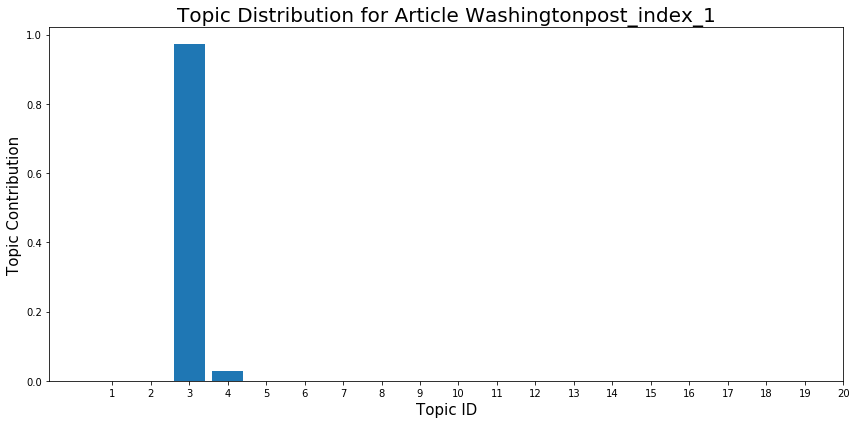

In [349]:
import matplotlib.pyplot as plt

bow = dictionary.doc2bow(df.iloc[1,5])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + "Washingtonpost_index_1", fontsize=20)
ax.set_xticks(np.linspace(1,20,20))
fig.tight_layout()
plt.show()

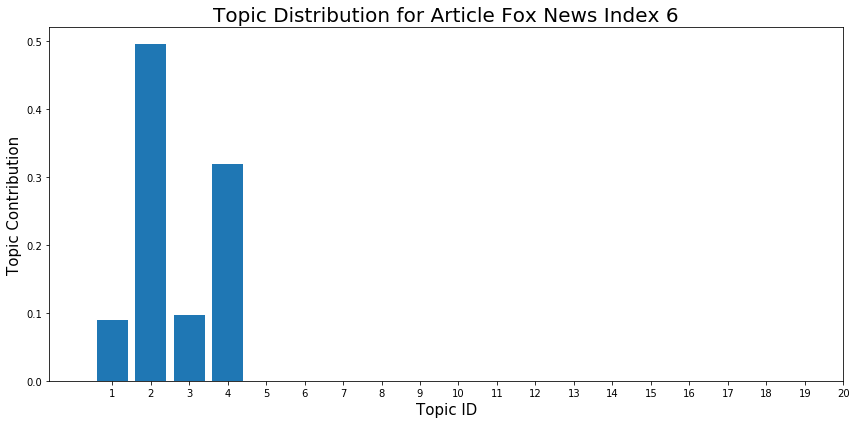

In [350]:
bow = dictionary.doc2bow(df.iloc[6,5])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])

import matplotlib.pyplot as plt
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + "Fox News Index 6", fontsize=20)
ax.set_xticks(np.linspace(1,20,20))
fig.tight_layout()
plt.show()

## Looks like Topic 3 is pro voting in mail(washington post), while Topic 2,4 are critical of them(fox news)

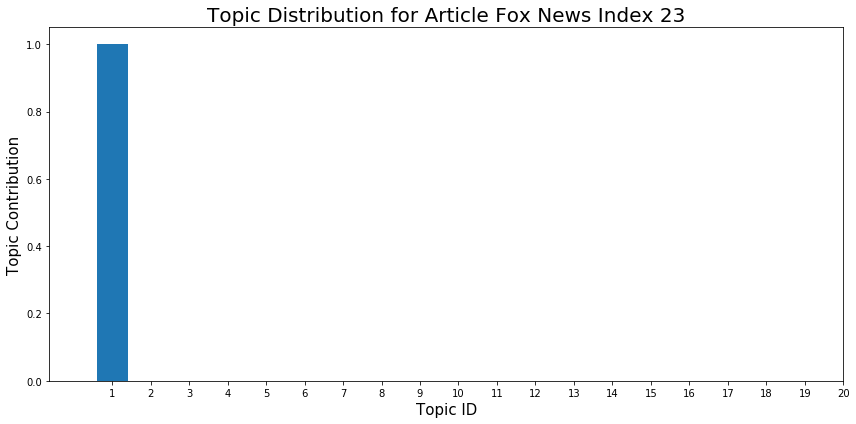

In [370]:
bow = dictionary.doc2bow(df.iloc[23,5])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])

import matplotlib.pyplot as plt
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + "Fox News Index 23", fontsize=20)
ax.set_xticks(np.linspace(1,20,20))
fig.tight_layout()
plt.show()

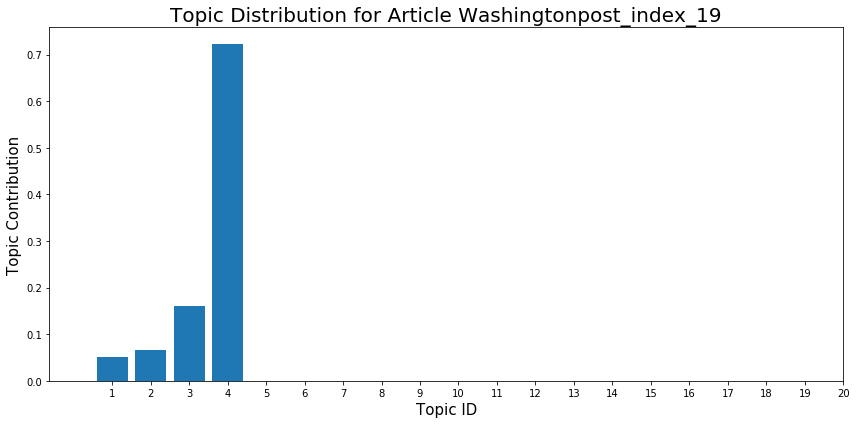

In [371]:
import matplotlib.pyplot as plt

bow = dictionary.doc2bow(df.iloc[19,5])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + "Washingtonpost_index_19", fontsize=20)
ax.set_xticks(np.linspace(1,20,20))
fig.tight_layout()
plt.show()

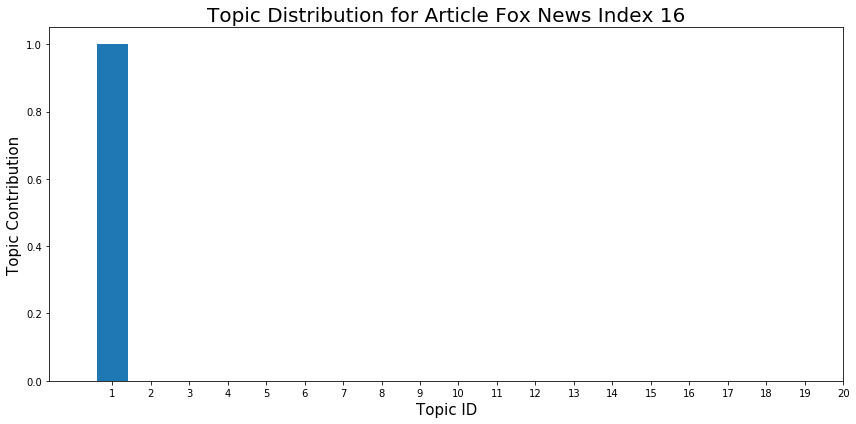

In [372]:
bow = dictionary.doc2bow(df.iloc[16,5])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])

import matplotlib.pyplot as plt
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + "Fox News Index 16", fontsize=20)
ax.set_xticks(np.linspace(1,20,20))
fig.tight_layout()
plt.show()

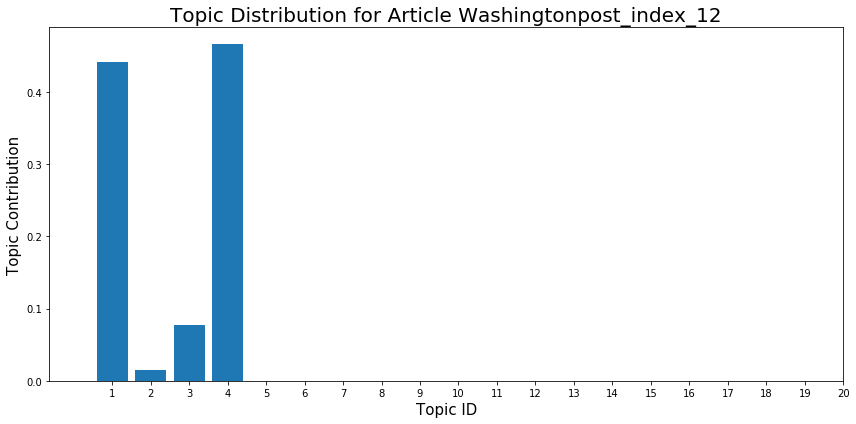

In [374]:
import matplotlib.pyplot as plt

bow = dictionary.doc2bow(df.iloc[12,5])
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + "Washingtonpost_index_12", fontsize=20)
ax.set_xticks(np.linspace(1,20,20))
fig.tight_layout()
plt.show()

In [433]:
# print the top 5 contributing topics and their words
for i in doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")

4 [('mail', 0.052834578), ('voting', 0.03348872), ('vote', 0.023804706), ('coronavirus', 0.022172326), ('texas', 0.021839205), ('voters', 0.02168035), ('said', 0.02114153), ('ballots', 0.0194062), ('state', 0.018773938), ('trump', 0.018339543)] 

1 [('mail', 0.051965196), ('voting', 0.050266217), ('said', 0.042900387), ('election', 0.042451397), ('states', 0.040527757), ('ballots', 0.029051604), ('ballot', 0.027948823), ('voter', 0.027034279), ('elections', 0.024574412), ('vote', 0.023828482)] 

3 [('mail', 0.066615045), ('voting', 0.044344146), ('ballots', 0.042764198), ('vote', 0.040560756), ('voters', 0.032633048), ('election', 0.025300983), ('states', 0.023398498), ('california', 0.022721468), ('state', 0.022559104), ('democrats', 0.017593669)] 

2 [('trump', 0.042466592), ('mail', 0.03643438), ('state', 0.033681586), ('ballots', 0.024219157), ('voters', 0.023661857), ('election', 0.0217962), ('voting', 0.020539721), ('president', 0.020129776), ('fraud', 0.01975514), ('absentee', 0

In [105]:
doc_topic_dist = np.array([[tup[1] for tup in lst] for lst in lda[corpus]])
doc_topic_dist.shape

(36, 5)

In [103]:
from scipy.stats import entropy

def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    It returns an array of length M where M is the number of documents in the corpus
    """
    # lets keep with the p,q notation above
    p = query[None,:].T # take transpose
    q = matrix.T # transpose matrix
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

In [102]:
def get_documents_distance(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    '''
    for index,val in np.ndenumerate(sims):
        print (index[0], val)
    '''

    df = pd.DataFrame(data=sims,columns=['distance'])
    
    #print(sims.argsort())
    #return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances
    return df

In [97]:
print(df[['title','source_id','url']])

                                                title            source_id  \
0        What voting by mail looks like when it works  the-washington-post   
1   Examining the arguments against voting by mail...  the-washington-post   
2   Coronavirus makes voting by mail even more imp...            usa-today   
3   As Trump attacks voting by mail, GOP builds 20...  the-washington-post   
4   The Cybersecurity 202: First DHS chief Tom Rid...  the-washington-post   
5   Widespread voting by mail poses risks of disen...            usa-today   
6   Trump charges voting by mail will result in ‘r...             fox-news   
7   As Trump lashes out at push to expand voting b...             fox-news   
8   Nearly two-thirds favor voting by mail, but wi...             fox-news   
9   Texas Lt. Gov. Dan Patrick: Mail-in voting is ...             fox-news   
10  Ruling that would expand Texas mail-in voting ...             fox-news   
11  Pelosi touts $3.6B vote-by-mail bill, now call...           

In [106]:
new_bow = dictionary.doc2bow(df.iloc[3,5])
new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
distance_array = get_documents_distance(new_doc_distribution,doc_topic_dist)
distance_array

,distance
0,0.361506
1,0.152144
2,0.139838
3,0.000005
4,0.377333
5,0.361412
6,0.566106
7,0.566129
8,0.566063
9,0.832287


In [438]:
df['distance'] = distance_array['distance']

In [446]:
print(df[['title','distance']].sort_values('distance'))
df[['title','distance','url']].sort_values('distance').to_csv('results.csv')

                                                title  distance
3   As Trump attacks voting by mail, GOP builds 20...  0.000122
2   Coronavirus makes voting by mail even more imp...  0.292680
33  Ex-Nevada AG describes ballots 'piled up in ap...  0.298249
19  Trump’s bogus attacks on mail-in voting could ...  0.339629
1   Examining the arguments against voting by mail...  0.378740
27  Senate Democrat: Mail-in ballots needed becaus...  0.388567
4   The Cybersecurity 202: First DHS chief Tom Rid...  0.439995
0        What voting by mail looks like when it works  0.442798
24  Minuscule number of potentially fraudulent bal...  0.442843
25  The Cybersecurity 202: Trump is trying to make...  0.457393
7   As Trump lashes out at push to expand voting b...  0.485974
20  Trump threatens funding for Michigan, Nevada o...  0.485991
22  Power Up: Trump’s inaccurate claims about mail...  0.486115
8   Nearly two-thirds favor voting by mail, but wi...  0.516435
31  Trump threatens to hold back funding

In [389]:
most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
most_similar_df['url']

0     https://www.washingtonpost.com/politics/2020/0...
1     https://www.washingtonpost.com/politics/2020/0...
2     https://www.usatoday.com/story/opinion/todaysd...
3     https://www.washingtonpost.com/politics/as-tru...
4     https://www.washingtonpost.com/news/powerpost/...
5     https://www.usatoday.com/story/opinion/todaysd...
6     https://www.foxnews.com/politics/trump-charges...
13    https://www.washingtonpost.com/politics/in-win...
14    https://www.foxnews.com/politics/darrell-issa-...
19    https://www.washingtonpost.com/news/powerpost/...
Name: url, dtype: object

In [38]:
df.head()

,source_id,title,url,content,content_full,tokenized_content
0,the-washington-post,What voting by mail looks like when it works,https://www.washingtonpost.com/politics/2020/0...,Examining the arguments against vote by mail: ...,Voting by mail will be new to millions of Amer...,"[voting, mail, new, millions, americans, state..."
1,the-washington-post,Examining the arguments against voting by mail...,https://www.washingtonpost.com/politics/2020/0...,Breaking: Michigan sends absentee ballots to 7...,President Trump is determined to fight against...,"[president, trump, efforts, voting, mail, nove..."
2,usa-today,Coronavirus makes voting by mail even more imp...,https://www.usatoday.com/story/opinion/todaysd...,"Donald Trump votes by mail, the practice dates...","Less than five months until Election Day, ther...","[less, five, election, day, mail, balloting, p..."
3,the-washington-post,"As Trump attacks voting by mail, GOP builds 20...",https://www.washingtonpost.com/politics/as-tru...,"Helping drive the effort is William Consovoy, ...",President Trump’s persistent attacks on mail-i...,"[president, trump, mail, voting, november, ele..."
4,the-washington-post,The Cybersecurity 202: First DHS chief Tom Rid...,https://www.washingtonpost.com/news/powerpost/...,None,with Tonya Riley\nThe first secretary of Homel...,"[first, secretary, security, president, trump,..."


In [41]:
import numpy as np
np.savetxt('/Users/tapas/Documents/Repos/all_articles.txt', df["content_full"].values, fmt='%s', delimiter='\t')

In [11]:
import gensim.models as g

In [42]:
#doc2vec parameters
vector_size = 300
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0 #0 = dbow; 1 = dmpv
worker_count = 1 #number of parallel processes


In [54]:
pretrained_emb = "/Users/tapas/Documents/Repos/doc2vec/toy_data/pretrained_word_embeddings.txt"
#Pre trained word embeding give better result than randomized word embeddings
train_corpus = "/Users/tapas/Documents/Repos/all_articles.txt"
saved_path = "/Users/tapas/Documents/Repos/news_analysis/news_model.bin"

In [73]:
from gensim.models.doc2vec import TaggedLineDocument,TaggedDocument
docs = g.doc2vec.TaggedLineDocument(train_corpus)

In [70]:
print(dir(docs))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'source']


In [83]:
train_tagged = df.apply(lambda x : TaggedDocument(words=x.tokenized_content,tags=[x.source_id]),axis=1)

In [156]:
train_tagged.values[3]

TaggedDocument(words=['president', 'trump', 'mail', 'voting', 'november', 'election', 'millions', 'ballots', 'voter', 'rolls', 'trump', 'campaign', 'republican', 'national', 'committee', 'groups', 'voting', 'could', 'house', 'amid', 'coronavirus', 'pandemic', 'supreme', 'court', 'also', 'one', 'trump', 'law', 'legal', 'rnc', 'several', 'state', 'group', 'election', 'trump', 'legal', 'national', 'party', 'voter', 'fraud', 'voting', 'year', 'groups', 'new', 'president', 'trump', 'widespread', 'mail', 'balloting', 'would', 'republicans', 'claims', 'voter', 'fraud', 'gop', 'legal', 'said', 'integrity', 'elections', 'fraud', 'election', 'time', 'mail', 'ballots', 'send', 'ballot', 'every', 'said', 'elections', 'since', 'think', 'many', 'ballots', 'mailed', 'great', 'public', 'voters', 'may', 'vote', 'trump', 'voting', 'mail', 'claims', 'lead', 'fraud', 'tweeted', 'want', 'mail', 'ballots', 'president', 'said', 'may', 'republicans', 'trump', 'even', 'trying', 'voting', 'mail', 'work', 'gop',

In [87]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

model = g.Doc2Vec(vector_size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, epochs=train_epoch)
model.build_vocab([x for x in tqdm(train_tagged.values)])
model.train([x for x in tqdm(train_tagged.values)],total_examples=len(train_tagged.values), epochs=1)
model.save(saved_path)

100%|██████████| 36/36 [00:00<00:00, 107776.55it/s]


In [88]:
print(model)

Doc2Vec(dbow+w,d300,n5,w15,s1e-05)


In [56]:
import gensim.models as g
import codecs

#parameters
#model="/Users/tapas/Documents/Repos/news_analysis/news_model.bin"
#test_docs="/Users/tapas/Documents/Repos/all_articles.txt"
output_file="/Users/tapas/Documents/Repos/news_analysis/test_vectors.txt"

#model = g.Doc2Vec.load("/Users/tapas/Documents/Repos/doc2vec/apnews_sg/word2vec.bin")

In [90]:
#inference hyper-parameters

start_alpha=0.01
infer_epoch=1000
'''
m = g.Doc2Vec.load(model)
test_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines()]

'''


'\nm = g.Doc2Vec.load(model)\ntest_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines()]\n\n'

In [89]:
print(type(model))

<class 'gensim.models.doc2vec.Doc2Vec'>


In [91]:


def get_paragraph_vector(content):
    vec = model.infer_vector(content, alpha=start_alpha, steps=infer_epoch)
    return vec

In [92]:
df['paragraph_vector'] = df.apply(lambda x: get_paragraph_vector(x.tokenized_content),axis=1) 

In [1]:
len(df.iloc[2,6])

NameError: name 'df' is not defined

In [116]:
new_vector = df.iloc[3,6]
sims = model.docvecs.most_similar([new_vector])
sims

[('the-washington-post', 0.9290522336959839),
 ('fox-news', 0.9000449776649475),
 ('usa-today', 0.07198482006788254)]

In [169]:
new_vector = df.iloc[11,6]
sims = model.docvecs.most_similar([new_vector])
sims

[('the-washington-post', 0.9289728403091431),
 ('fox-news', 0.9014730453491211),
 ('usa-today', 0.07260637730360031)]

In [158]:
df.iloc[3,5]

['president',
 'trump',
 'mail',
 'voting',
 'november',
 'election',
 'millions',
 'ballots',
 'voter',
 'rolls',
 'trump',
 'campaign',
 'republican',
 'national',
 'committee',
 'groups',
 'voting',
 'could',
 'house',
 'amid',
 'coronavirus',
 'pandemic',
 'supreme',
 'court',
 'also',
 'one',
 'trump',
 'law',
 'legal',
 'rnc',
 'several',
 'state',
 'group',
 'election',
 'trump',
 'legal',
 'national',
 'party',
 'voter',
 'fraud',
 'voting',
 'year',
 'groups',
 'new',
 'president',
 'trump',
 'widespread',
 'mail',
 'balloting',
 'would',
 'republicans',
 'claims',
 'voter',
 'fraud',
 'gop',
 'legal',
 'said',
 'integrity',
 'elections',
 'fraud',
 'election',
 'time',
 'mail',
 'ballots',
 'send',
 'ballot',
 'every',
 'said',
 'elections',
 'since',
 'think',
 'many',
 'ballots',
 'mailed',
 'great',
 'public',
 'voters',
 'may',
 'vote',
 'trump',
 'voting',
 'mail',
 'claims',
 'lead',
 'fraud',
 'tweeted',
 'want',
 'mail',
 'ballots',
 'president',
 'said',
 'may',
 're

In [155]:

sims2 = model.most_similar([new_vector])
sims2

/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('make', 0.6965751647949219),
 ('said', 0.6558591723442078),
 ('gov', 0.6151562333106995),
 ('voters', 0.6012398600578308),
 ('voting', 0.5903368592262268),
 ('voter', 0.5892876982688904),
 ('fraud', 0.583672285079956),
 ('still', 0.5423531532287598),
 ('mail', 0.5362420678138733),
 ('order', 0.5256496071815491)]

/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':
/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/buan6341/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # This is added back by InteractiveShellApp.init_path()


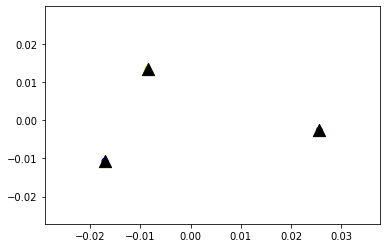

In [134]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans_model = KMeans(n_clusters=3, init='k-means++',max_iter=100)
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels = kmeans_model.labels_.tolist()

l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)

plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [141]:
print(dir(model.docvecs))

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__ignoreds', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__numpys', '__recursive_saveloads', '__reduce__', '__reduce_ex__', '__repr__', '__scipys', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_adapt_by_suffix', '_index_to_doctag', '_int_index', '_load_specials', '_save_specials', '_smart_save', 'add', 'closer_than', 'count', 'distance', 'distances', 'doctag_syn0', 'doctag_syn0norm', 'doctags', 'doesnt_match', 'get_vector', 'index2entity', 'index_to_doctag', 'init_sims', 'int_index', 'load', 'mapfile_path', 'max_rawint', 'most_similar', 'most_similar_to_given', 'n_similarity', 'offset2doctag', 'rank', 'save', 'save_word2vec_format', 'similarity', 'similarity_unseen_docs', 'vector_size', 'vectors', 've

In [150]:
print(model.docvecs[3])

KeyError: "tag '3' not seen in training corpus/invalid"

In [146]:
for vec in model.docvecs:
    print(vec)

[ 1.24786643e-03 -2.52164202e-03 -1.96052413e-03  3.83259205e-04
  8.10176076e-04  2.75077298e-04  2.31673196e-03  1.76863885e-03
  2.66257976e-03 -2.20183725e-03  1.40158006e-03 -1.47375592e-03
  8.83800851e-04 -2.17223936e-03 -2.66231643e-03  3.64825508e-04
 -1.05123276e-04  1.69582793e-03  3.13695939e-03 -1.98631594e-03
  1.30425920e-04  1.37335993e-03 -4.11634613e-03  6.06799986e-05
 -4.55813576e-03 -2.74446560e-03 -1.00082869e-03  2.14113342e-03
  3.90393776e-03  1.22036471e-03  1.74216437e-03  1.34215225e-04
 -4.21790313e-03  2.26869155e-03 -2.45356723e-03 -3.24309873e-03
  4.38949233e-03  5.13798848e-04 -4.01550176e-04 -1.85021118e-03
 -3.82045144e-03 -3.75942187e-03 -4.91648819e-03 -4.32498317e-04
  1.41665793e-03 -2.02337233e-03  5.66984643e-04 -6.79357350e-03
 -1.12371380e-03  1.73723907e-03  1.95788639e-03  1.75530964e-04
 -2.00066529e-03  3.52271809e-03 -4.34569828e-03  3.14525189e-03
 -2.80779507e-03 -4.39203903e-03  1.73592032e-03 -5.31430647e-04
 -9.45993175e-04  1.49885

KeyError: "tag '3' not seen in training corpus/invalid"